## Data Science Assessment for Andani

In [886]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import glob
import os


In [887]:
csv_files = glob.glob('oulad_data/*.csv')
dataframes = {os.path.basename(file): pd.read_csv(file) for file in csv_files}

In [888]:
dataframes.keys()

dict_keys(['assessments.csv', 'courses.csv', 'studentAssessment.csv', 'studentInfo.csv', 'studentRegistration.csv', 'studentVle.csv', 'vle.csv'])

In [889]:
for name in list(dataframes.keys()):
    old_name = name
    new_name = name.removesuffix(".csv")
    dataframes.update( {new_name: dataframes.pop(old_name)})

In [890]:
dataframes.keys()

dict_keys(['assessments', 'courses', 'studentAssessment', 'studentInfo', 'studentRegistration', 'studentVle', 'vle'])

In [891]:
dataframes['assessments'].head(10)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1,TMA,30,20
1,AAA,2013J,2,TMA,75,20
2,AAA,2013J,3,TMA,120,20
3,AAA,2013J,4,Exam,230,100
4,AAA,2014B,5,TMA,30,20
5,AAA,2014B,6,CMA,75,30
6,AAA,2014B,7,TMA,120,20
7,AAA,2014B,8,Exam,230,100
8,BBB,2013J,9,CMA,30,30
9,BBB,2013J,10,CMA,75,30


In [892]:
dataframes['courses'].head()

,code_module,code_presentation,length
0,AAA,2013J,240
1,AAA,2014B,240
2,BBB,2013J,240
3,BBB,2014B,240
4,CCC,2013J,240


In [893]:
dataframes['studentAssessment'].head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1,9,26,0,29
1,1,10,28,0,55
2,1,12,29,0,76
3,1,16,27,0,24
4,1,19,24,0,19


In [894]:
dataframes['studentInfo'].head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,BBB,2014B,1,M,Wales,A Level or Equivalent,20-30%,55<=,2,90,N,Fail
1,EEE,2014B,2,F,North Region,A Level or Equivalent,40-50%,0-35,1,150,N,Pass
2,DDD,2013J,2,M,South East Region,Post Graduate Qualification,20-30%,55<=,0,90,N,Fail
3,CCC,2014B,3,F,South East Region,HE Qualification,90-100%,0-35,1,120,N,Fail
4,BBB,2014B,4,M,South Region,A Level or Equivalent,70-80%,35-55,1,60,N,Distinction


In [895]:
dataframes['studentInfo'].id_student.nunique()

1000

In [896]:
dataframes['studentRegistration'].head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,BBB,2014B,1,-51,NaN
1,EEE,2014B,2,-40,NaN
2,DDD,2013J,2,-56,NaN
3,CCC,2014B,3,-50,NaN
4,BBB,2014B,4,-39,NaN


In [897]:
dataframes['studentVle'].head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,BBB,2014B,1,68,57,1
1,BBB,2014B,1,63,73,3
2,BBB,2014B,1,67,176,3
3,BBB,2014B,1,76,53,9
4,BBB,2014B,1,79,193,4


In [898]:
dataframes['studentVle'].id_student.nunique()

1000

In [899]:
df_studentVle = dataframes['studentVle'].groupby(['code_module','code_presentation','id_student','id_site'],sort=False)['sum_click'].sum().reset_index()

In [900]:
df_studentVle

,code_module,code_presentation,id_student,id_site,sum_click
0,BBB,2014B,1,68,13
1,BBB,2014B,1,63,17
2,BBB,2014B,1,67,36
3,BBB,2014B,1,76,34
4,BBB,2014B,1,79,11
...,...,...,...,...,...
27092,AAA,2014B,1000,26,21
27093,AAA,2014B,1000,38,19
27094,AAA,2014B,1000,28,32
27095,AAA,2014B,1000,24,16


In [901]:
print(df_studentVle.id_student.nunique())
dataframes['studentVle'].id_site.nunique()

1000


200

In [902]:
df_studentVle[df_studentVle.id_student==100]

,code_module,code_presentation,id_student,id_site,sum_click
2557,BBB,2014B,100,79,36
2558,BBB,2014B,100,61,60
2559,BBB,2014B,100,71,28
2560,BBB,2014B,100,62,40
2561,BBB,2014B,100,76,42
2562,BBB,2014B,100,70,34
2563,BBB,2014B,100,72,38
2564,BBB,2014B,100,65,22
2565,BBB,2014B,100,77,45
2566,BBB,2014B,100,63,19


In [903]:
dataframes['vle'].head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,1,AAA,2013J,quiz,4,12
1,2,AAA,2013J,subpage,25,32
2,3,AAA,2013J,page,4,7
3,4,AAA,2013J,glossary,7,11
4,5,AAA,2013J,oucontent,20,21


In [904]:
vle_df = df_studentVle.merge(dataframes['vle'], on = ['id_site','code_module','code_presentation'],how = 'left')

In [905]:
vle_df

,code_module,code_presentation,id_student,id_site,sum_click,activity_type,week_from,week_to
0,BBB,2014B,1,68,13,url,23,24
1,BBB,2014B,1,63,17,url,26,31
2,BBB,2014B,1,67,36,forum,8,14
3,BBB,2014B,1,76,34,oucontent,4,11
4,BBB,2014B,1,79,11,page,26,28
...,...,...,...,...,...,...,...,...
27092,AAA,2014B,1000,26,21,glossary,27,32
27093,AAA,2014B,1000,38,19,page,26,35
27094,AAA,2014B,1000,28,32,url,22,31
27095,AAA,2014B,1000,24,16,url,26,27


In [906]:
for name in list(dataframes.keys()):
    print(f'number of rows in {name}: {len(dataframes[name])}')

number of rows in assessments: 40
number of rows in courses: 10
number of rows in studentAssessment: 5392
number of rows in studentInfo: 1507
number of rows in studentRegistration: 1507
number of rows in studentVle: 114130
number of rows in vle: 200


In [907]:
df_1 = dataframes['assessments'].merge(dataframes['courses'],on = ['code_module','code_presentation'] ,how = 'left')
df_1.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,length
0,AAA,2013J,1,TMA,30,20,240
1,AAA,2013J,2,TMA,75,20,240
2,AAA,2013J,3,TMA,120,20,240
3,AAA,2013J,4,Exam,230,100,240
4,AAA,2014B,5,TMA,30,20,240


In [908]:
df_1.shape

(40, 7)

In [909]:
df_1 = df_1.merge(dataframes['studentAssessment'],on = ['id_assessment'] ,how = 'left')
df_1.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,length,id_student,date_submitted,is_banked,score
0,AAA,2013J,1,TMA,30,20,240,9,26,0,29
1,AAA,2013J,1,TMA,30,20,240,10,28,0,55
2,AAA,2013J,1,TMA,30,20,240,12,29,0,76
3,AAA,2013J,1,TMA,30,20,240,16,27,0,24
4,AAA,2013J,1,TMA,30,20,240,19,24,0,19


In [910]:
df_1.shape

(5392, 11)

In [911]:
df_1 = df_1.merge(dataframes['studentInfo'],on = ['code_module','code_presentation','id_student'] ,how = 'left')
df_1.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,length,id_student,date_submitted,is_banked,score,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,1,TMA,30,20,240,9,26,0,29,F,South East Region,Post Graduate Qualification,80-90%,55<=,1,30,N,Fail
1,AAA,2013J,1,TMA,30,20,240,10,28,0,55,F,North Western Region,HE Qualification,40-50%,0-35,0,90,N,Pass
2,AAA,2013J,1,TMA,30,20,240,12,29,0,76,M,South Region,Post Graduate Qualification,30-40%,55<=,1,90,N,Pass
3,AAA,2013J,1,TMA,30,20,240,16,27,0,24,F,Wales,HE Qualification,0-10%,0-35,0,90,N,Fail
4,AAA,2013J,1,TMA,30,20,240,19,24,0,19,F,East Midlands Region,No Formal quals,90-100%,55<=,0,120,N,Fail


In [912]:
df_1.shape

(5392, 20)

In [913]:
df_1 = df_1.merge(dataframes['studentRegistration'],on = ['code_module','code_presentation','id_student'] ,how = 'left')
df_1.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,length,id_student,date_submitted,is_banked,...,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,1,TMA,30,20,240,9,26,0,...,South East Region,Post Graduate Qualification,80-90%,55<=,1,30,N,Fail,-15,NaN
1,AAA,2013J,1,TMA,30,20,240,10,28,0,...,North Western Region,HE Qualification,40-50%,0-35,0,90,N,Pass,-25,NaN
2,AAA,2013J,1,TMA,30,20,240,12,29,0,...,South Region,Post Graduate Qualification,30-40%,55<=,1,90,N,Pass,-38,NaN
3,AAA,2013J,1,TMA,30,20,240,16,27,0,...,Wales,HE Qualification,0-10%,0-35,0,90,N,Fail,-41,NaN
4,AAA,2013J,1,TMA,30,20,240,19,24,0,...,East Midlands Region,No Formal quals,90-100%,55<=,0,120,N,Fail,-27,NaN


In [914]:
df_1.shape

(5392, 22)

In [915]:
# df_1 = df_1.merge(df_studentVle,on = ['code_module','code_presentation','id_student'] ,how = 'left')
# df_1.head(15)

In [916]:
# df_1.shape

In [917]:
# df_1 = df_1.merge(dataframes['vle'], on = ['id_site','code_module','code_presentation'], how='left')
# df_1.head(10)

In [918]:
df_1.shape

(5392, 22)

In [919]:
df_1.columns

Index(['code_module', 'code_presentation', 'id_assessment', 'assessment_type',
       'date', 'weight', 'length', 'id_student', 'date_submitted', 'is_banked',
       'score', 'gender', 'region', 'highest_education', 'imd_band',
       'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability',
       'final_result', 'date_registration', 'date_unregistration'],
      dtype='object')

In [920]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5392 entries, 0 to 5391
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           5392 non-null   object 
 1   code_presentation     5392 non-null   object 
 2   id_assessment         5392 non-null   int64  
 3   assessment_type       5392 non-null   object 
 4   date                  5392 non-null   int64  
 5   weight                5392 non-null   int64  
 6   length                5392 non-null   int64  
 7   id_student            5392 non-null   int64  
 8   date_submitted        5392 non-null   int64  
 9   is_banked             5392 non-null   int64  
 10  score                 5392 non-null   int64  
 11  gender                5392 non-null   object 
 12  region                5392 non-null   object 
 13  highest_education     5392 non-null   object 
 14  imd_band              5392 non-null   object 
 15  age_band             

In [921]:
df_1.describe()

,id_assessment,date,weight,length,id_student,date_submitted,is_banked,score,num_of_prev_attempts,studied_credits,date_registration,date_unregistration
count,5392.000000,5392.000000,5392.000000,5392.0,5392.000000,5392.000000,5392.0,5392.000000,5392.000000,5392.000000,5392.000000,188.000000
mean,20.510015,111.998331,42.436944,240.0,501.831602,108.998331,0.0,58.553042,0.995549,90.105712,-34.259273,129.021277
std,11.295047,73.857894,32.746585,0.0,289.989474,73.942004,0.0,25.680372,0.805506,42.804313,14.637153,41.461142
min,1.000000,30.000000,20.000000,240.0,1.000000,24.000000,0.0,0.000000,0.000000,30.000000,-59.000000,31.000000
25%,11.000000,30.000000,20.000000,240.0,250.000000,30.000000,0.0,41.000000,0.000000,60.000000,-47.000000,98.000000
50%,20.000000,75.000000,30.000000,240.0,500.000000,75.000000,0.0,65.000000,1.000000,90.000000,-34.000000,131.000000
75%,30.000000,120.000000,30.000000,240.0,756.000000,120.000000,0.0,78.000000,2.000000,120.000000,-21.000000,160.500000
max,40.000000,230.000000,100.000000,240.0,1000.000000,230.000000,0.0,100.000000,2.000000,150.000000,-10.000000,198.000000


In [922]:
df_1.drop(['length', 'score'], axis=1, inplace=True)

In [923]:
vle_df.describe()

,id_student,id_site,sum_click,week_from,week_to
count,27097.000000,27097.00000,27097.000000,27097.000000,27097.000000
mean,504.886777,100.13865,21.085249,15.133114,20.008377
std,289.679445,56.87700,14.848264,8.724118,8.720382
min,1.000000,1.00000,1.000000,1.000000,3.000000
25%,253.000000,52.00000,9.000000,8.000000,12.000000
50%,505.000000,98.00000,18.000000,15.000000,20.000000
75%,759.000000,149.00000,29.000000,23.000000,28.000000
max,1000.000000,200.00000,112.000000,29.000000,35.000000


In [924]:
df_1.dtypes

code_module              object
code_presentation        object
id_assessment             int64
assessment_type          object
date                      int64
weight                    int64
id_student                int64
date_submitted            int64
is_banked                 int64
gender                   object
region                   object
highest_education        object
imd_band                 object
age_band                 object
num_of_prev_attempts      int64
studied_credits           int64
disability               object
final_result             object
date_registration         int64
date_unregistration     float64
dtype: object

In [925]:
df_categorical = df_1.select_dtypes(include=object)
len(df_categorical.columns)

10

In [926]:
df_numerical = df_1.select_dtypes(exclude=object)
len(df_numerical.columns)

10

In [927]:
for col in df_categorical.columns:
    unique = df_categorical[col].unique()
    unique.sort()
    print(f'- {col}: has {len(unique)} unique values \n  {unique}')

- code_module: has 5 unique values 
  ['AAA' 'BBB' 'CCC' 'DDD' 'EEE']
- code_presentation: has 2 unique values 
  ['2013J' '2014B']
- assessment_type: has 3 unique values 
  ['CMA' 'Exam' 'TMA']
- gender: has 2 unique values 
  ['F' 'M']
- region: has 11 unique values 
  ['East Anglian Region' 'East Midlands Region' 'London Region'
 'North Region' 'North Western Region' 'Scotland' 'South East Region'
 'South Region' 'South West Region' 'Wales' 'West Midlands Region']
- highest_education: has 5 unique values 
  ['A Level or Equivalent' 'HE Qualification' 'Lower Than A Level'
 'No Formal quals' 'Post Graduate Qualification']
- imd_band: has 10 unique values 
  ['0-10%' '10-20%' '20-30%' '30-40%' '40-50%' '50-60%' '60-70%' '70-80%'
 '80-90%' '90-100%']
- age_band: has 3 unique values 
  ['0-35' '35-55' '55<=']
- disability: has 2 unique values 
  ['N' 'Y']
- final_result: has 4 unique values 
  ['Distinction' 'Fail' 'Pass' 'Withdrawn']


In [928]:
def categorize_region(region):
    if region in ['North Region', 'North Western Region', 'Scotland']:
        return 'North'
    elif region in ['East Midlands Region', 'West Midlands Region']:
        return 'Midlands'
    elif region in ['South Region', 'South West Region']:
        return 'South'
    elif region in ['South East Region', 'London Region']:
        return 'South East & London'
    elif region in ['East Anglian Region', 'Wales']:
        return 'East & Wales'
    else:
        return 'Unknown'

df_1['Area'] = df_1['region'].apply(categorize_region)
df_1[['Area','region']]

,Area,region
0,South East & London,South East Region
1,North,North Western Region
2,South,South Region
3,East & Wales,Wales
4,Midlands,East Midlands Region
...,...,...
5387,South East & London,South East Region
5388,East & Wales,East Anglian Region
5389,East & Wales,East Anglian Region
5390,Midlands,East Midlands Region


In [929]:
def categorize_band(percentage):
    if percentage in ['0-10%', '10-20%']:
        return 'Very Low'
    elif percentage in ['20-30%', '30-40%']:
        return 'Low'
    elif percentage in ['40-50%', '50-60%']:
        return 'Medium'
    elif percentage in ['60-70%', '70-80%']:
        return 'High'
    elif percentage in ['80-90%', '90-100%']:
        return 'Very High'
    else:
        return 'Unknown'

# Apply the function
df_1['percent range'] = df_1['imd_band'].apply(categorize_band)
df_1[['imd_band','percent range']]

,imd_band,percent range
0,80-90%,Very High
1,40-50%,Medium
2,30-40%,Low
3,0-10%,Very Low
4,90-100%,Very High
...,...,...
5387,60-70%,High
5388,80-90%,Very High
5389,30-40%,Low
5390,90-100%,Very High


In [930]:
def categorize_qualification(qual):
    if qual == 'No Formal quals':
        return 'None'
    elif qual == 'Lower Than A Level':
        return 'Lower Than A'
    elif qual == 'A Level or Equivalent':
        return 'Mid or A-level'
    elif qual == 'HE Qualification':
        return 'Higher'
    elif qual == 'Post Graduate Qualification':
        return 'Postgrad'
    else:
        return 'Unknown'

# Apply the function
df_1['Qualification'] = df_1['highest_education'].apply(categorize_qualification)

In [931]:
df_1.drop(['region','imd_band','highest_education'], axis=1, inplace=True)

In [932]:
df_categorical = df_1.select_dtypes(include=object)
df_numerical = df_1.select_dtypes(exclude=object)

C:\Users\a253690\AppData\Local\Temp\1\ipykernel_29996\834962961.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x =col, data = df_numerical, fill=True, ax = ax[i[0],i[1]])


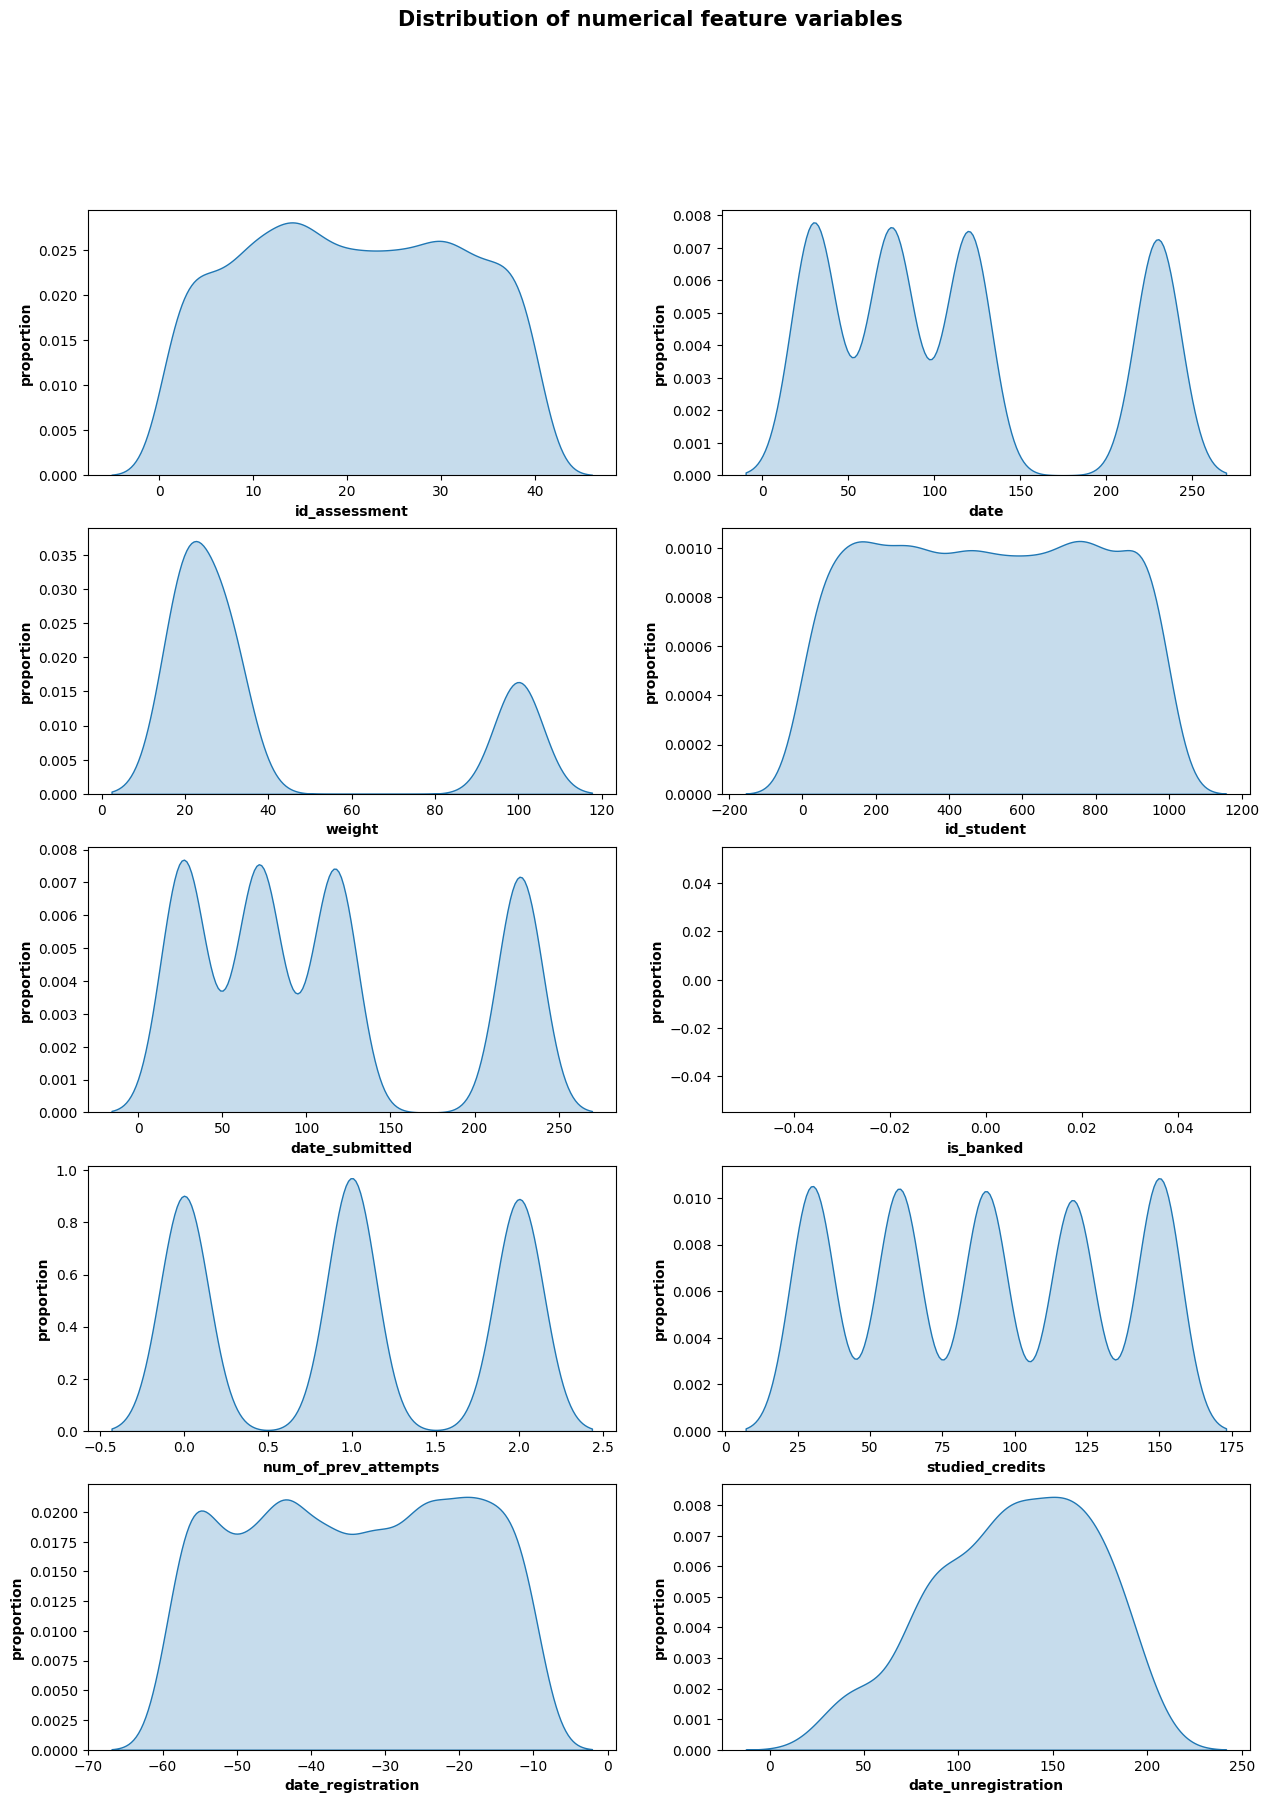

In [933]:
features_array = np.array(df_numerical.columns, dtype='object').reshape(5,2)
fig, ax  =  plt.subplots(5,2,sharey=False,figsize=(15,20))
for i, col in np.ndenumerate(features_array):
    sns.kdeplot(x =col, data = df_numerical, fill=True, ax = ax[i[0],i[1]])
    ax[i[0],i[1]].set_xlabel(col, fontweight="bold")
    ax[i[0],i[1]].set_ylabel("proportion", fontweight="bold")
plt.suptitle("Distribution of numerical feature variables", fontweight="bold", size=(15))
plt.show()

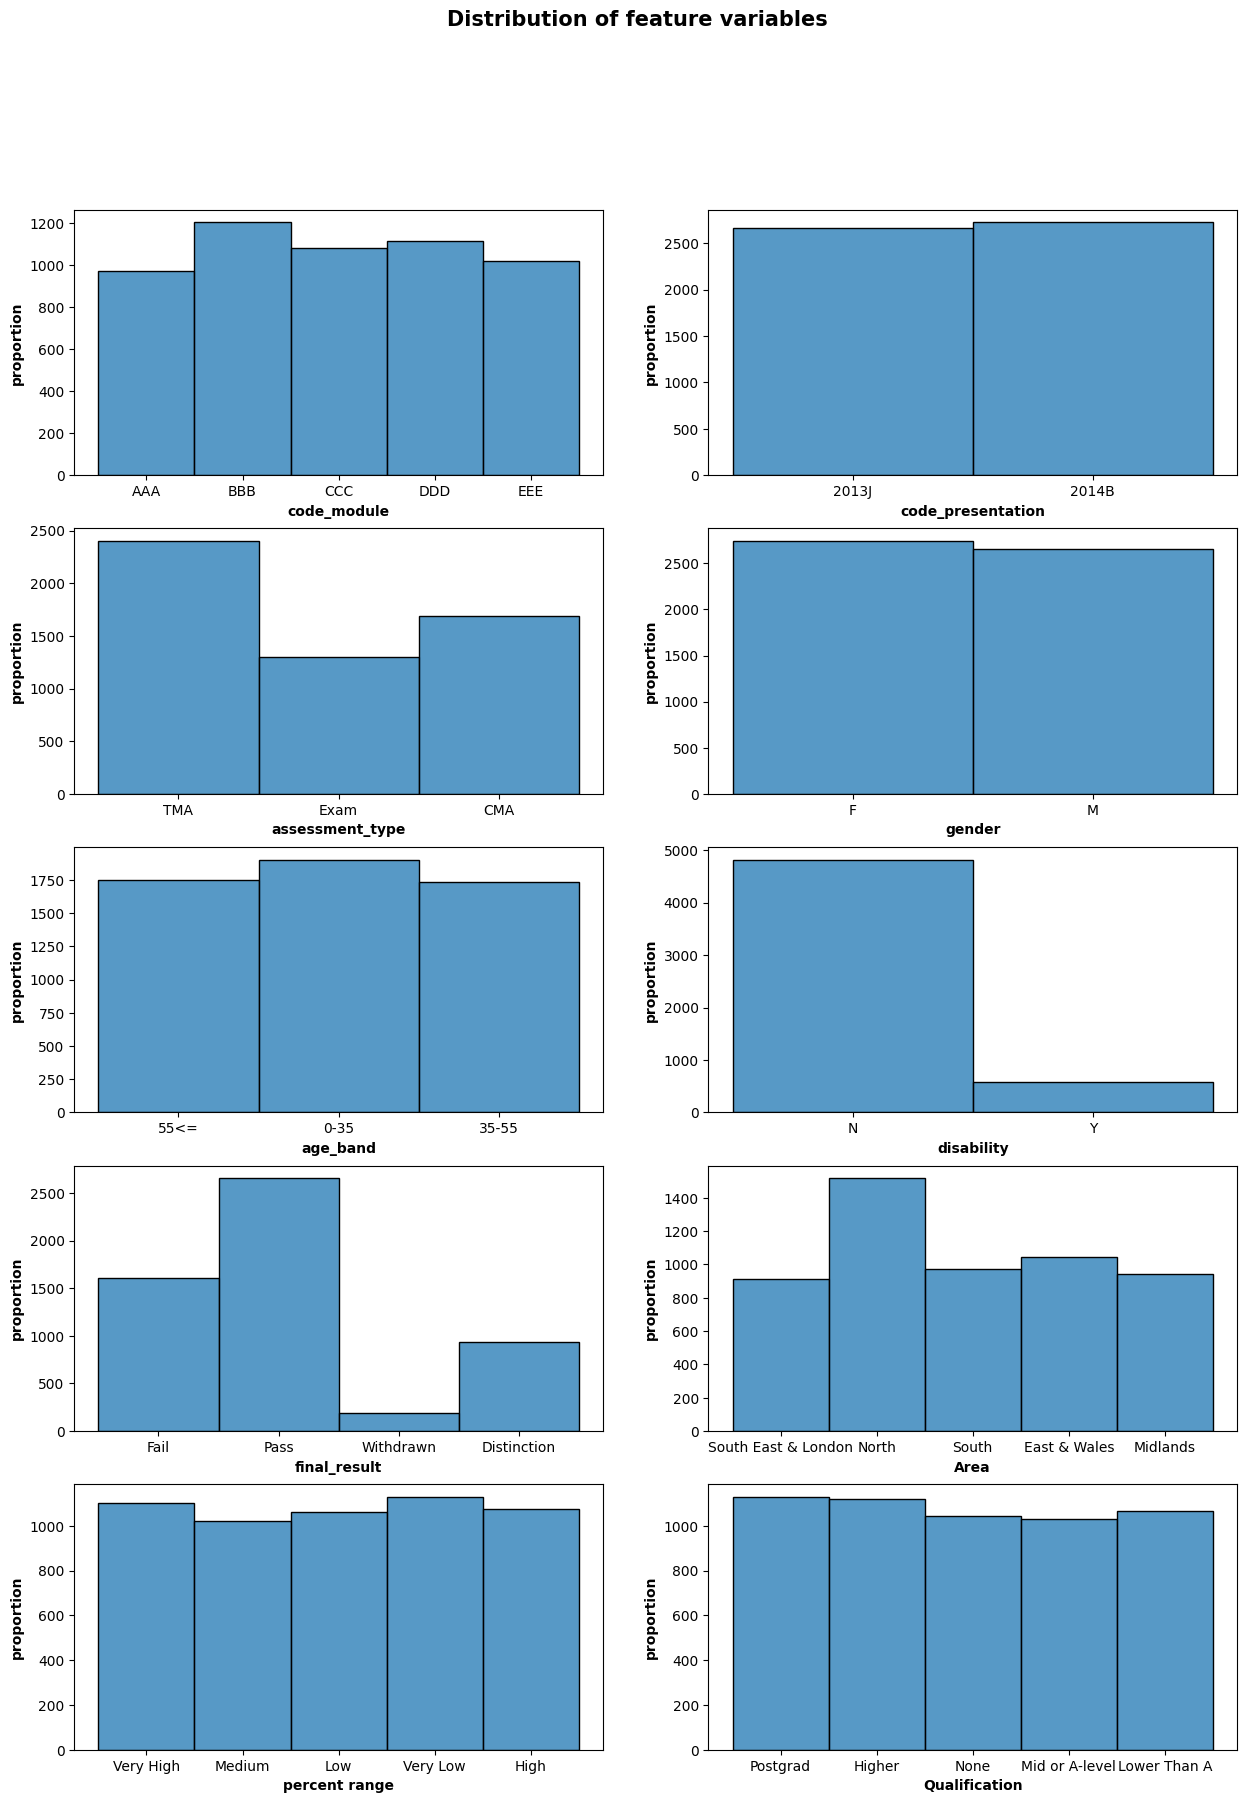

In [934]:
features_array_cat = np.array(df_categorical.columns, dtype='object').reshape(5,2)
fig, ax  =  plt.subplots(5,2,sharey=False,figsize=(15,20))
for i, col in np.ndenumerate(features_array_cat):
    sns.histplot(x =col, data = df_categorical, fill=True, ax = ax[i[0],i[1]])
    ax[i[0],i[1]].set_xlabel(col, fontweight="bold")
    ax[i[0],i[1]].set_ylabel("proportion", fontweight="bold")
plt.suptitle("Distribution of feature variables", fontweight="bold", size=(15))
plt.show()
#v